In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
os.chdir('Data')

In [2]:
def interpret(dat, column, char = ","):
        c=0
        for i in range(1,len(dat)):
            try:
                dat[i][column] = float(dat[i][column].replace(',',''))
            except ValueError:
                c+=1
        for _ in range(c):
            del dat[-1]
        
        for i in range(len(dat)):
            for j in range(1,len(dat[i])):
                if dat[i][j] == "#DIV/0!":
                    dat[i][j] = 0
        return dat
    
def getData(name):
        with open("CSV Data Sheet "+name+".csv", 'r') as file:
            read = csv.reader(file)
            data = [i for i in read]
        data = interpret(data, 3)
        return zip(*data)

def data():
    return [[list(k) for k in getData(i)] for i in ["Q1 1","Q1 2","Q2 1"]]


def draw(sheet, column, condition, ylab = [0, 2]):
    d = data()
    o = []
    for j in range(1,len(condition)):
        o.append([d[sheet][column][1:][i]
                  for i in range(len(d[sheet][column][1:]))
                  if d[sheet][condition[0]][1:][i] == condition[j]])
    xnote = [d[ylab[0]][ylab[1]][1:][i]
             for i in range(len(d[ylab[0]][ylab[1]][1:]))
             if d[ylab[0]][condition[0]][1:][i] == condition[1]]
    fig = plt.figure(figsize=[15, 10])
    ax = fig.gca()
    for i in range(len(o)):
        #ax.scatter(range(len(o[i])),o[i], label=condition[i+1], marker=".", s=7)
        ax.plot(o[i], label=condition[i+1])
    ax.legend()
    plt.title(d[sheet][column][0])
    plt.xticks(range(0,len(xnote),len(xnote)//10), xnote[::len(xnote)//10])
    plt.show()
    return o
    
def standardDeviation(sheet, column, condition):
    d = data()[sheet]
    for j in range(1,len(condition)):
        o = ([float(d[column][1:][i])
                  for i in range(len(d[column][1:]))
                  if d[condition[0]][1:][i] == condition[j]])
        mean = sum(o)/len(o)
        sig = sum([abs(i - mean)**2 for i in o])
        yield "SD: " + str(round((sig/len(o))**0.5,5)) + " Mean:" + str(round(mean,5))

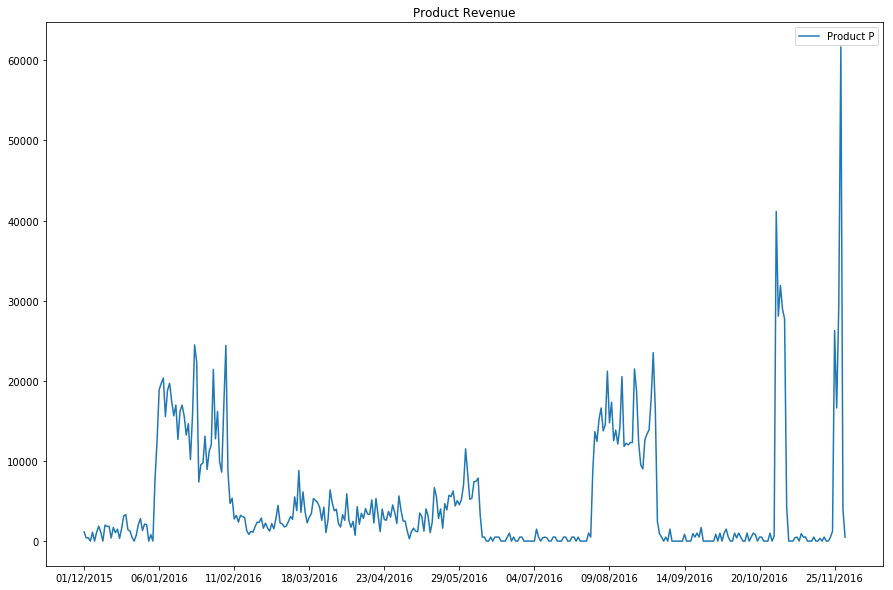

In [3]:
plottedData = draw(2, 5, [0,"Product P"], [2,1])

In [163]:
for i in standardDeviation(2, 5, [0, "Product P"]):
    print(i)

SD: 7335.2232 Mean:4908.2538


In [ ]:

~